In [ ]:
from PIL import Image

image_path="/content/Chap3.3.tif"

original_path = Image.open(image_path).convert('L')
print("image loaded succesfully")

image loaded succesfully


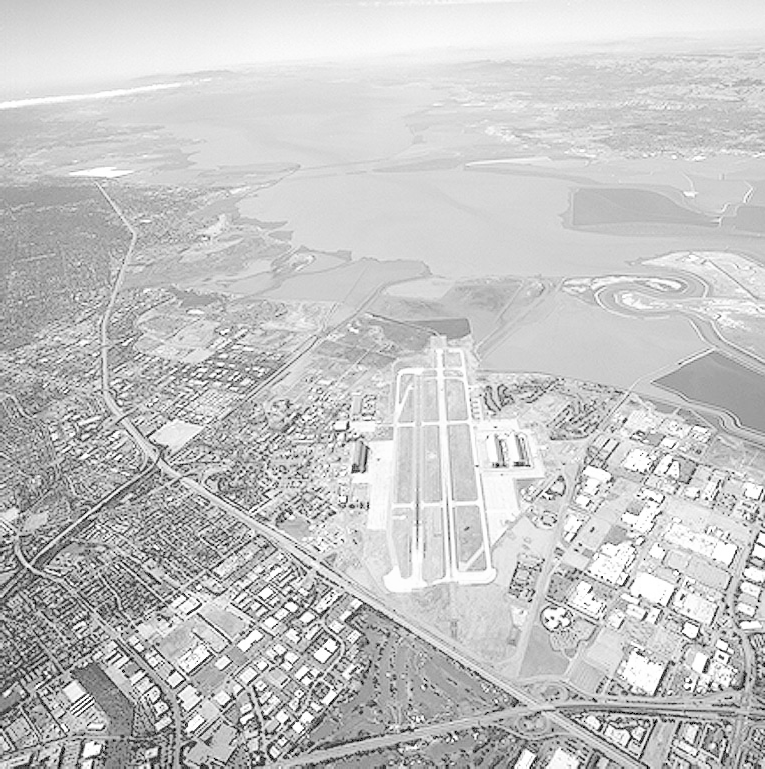

In [ ]:
display(original_path)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# load image
image_path='/content/Chap3.3.tif'
img= cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
# Normalize to [0,1]
img_normalized= img/255.0

In [ ]:
# log transformation
c_log= 1/np.log(1+np.max(img_normalized))
log_transformed=c_log*np.log(1+img_normalized)

# convert bacl to uint8
log_transformed_uint8=np.uint8(log_transformed*255)

In [ ]:
gamma_values=[0.4,0.7,-1.0,1.5,2.5]
gamma_transformed_images=[]
for gamma in gamma_values:
  gamma_corrected=np.power(img_normalized,gamma)
  gamma_corrected_uint8=np.uint8(gamma_corrected*255)
  gamma_transformed_images.append((gamma,gamma_corrected_uint8))

/tmp/ipython-input-959380550.py:4: RuntimeWarning: divide by zero encountered in power
  gamma_corrected=np.power(img_normalized,gamma)
/tmp/ipython-input-959380550.py:5: RuntimeWarning: invalid value encountered in cast
  gamma_corrected_uint8=np.uint8(gamma_corrected*255)


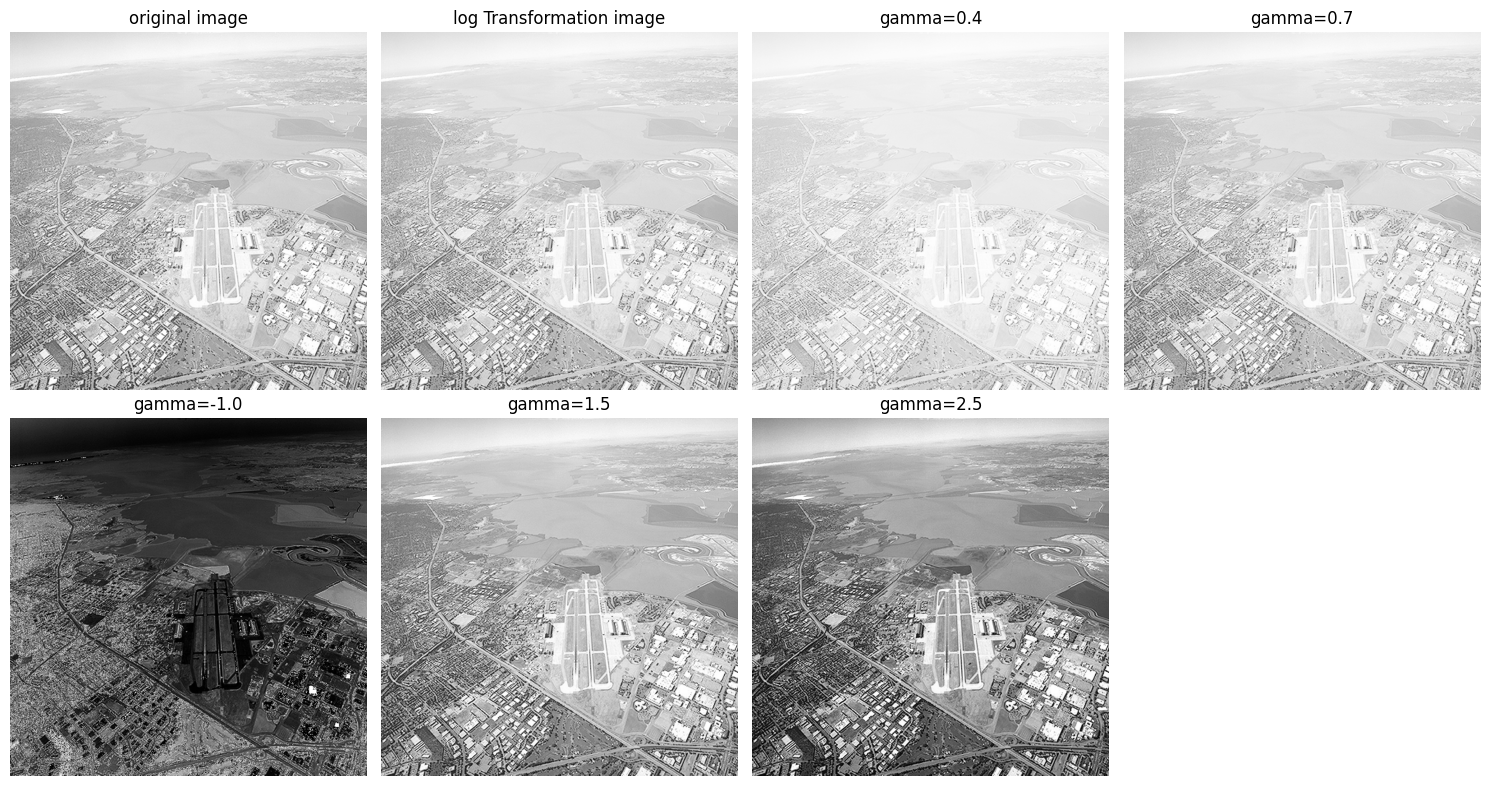

In [ ]:
plt.figure(figsize=(15,8))
# original image
plt.subplot(2,len(gamma_values)//2+2,1)
plt.imshow(img,cmap='gray')
plt.title("original image")
plt.axis("off")

# Log Transformation Image
plt.subplot(2,len(gamma_values)//2+2,2)
plt.imshow(log_transformed_uint8,cmap='gray')
plt.title("log Transformation image")
plt.axis("off")
# Gamma image
for i,(gamma,g_img) in enumerate(gamma_transformed_images):
  plt.subplot(2,len(gamma_values)//2+2,i+3)
  plt.imshow(g_img,cmap="gray")
  plt.title(f"gamma={gamma}")
  plt.axis("off")
plt.tight_layout()
plt.show()

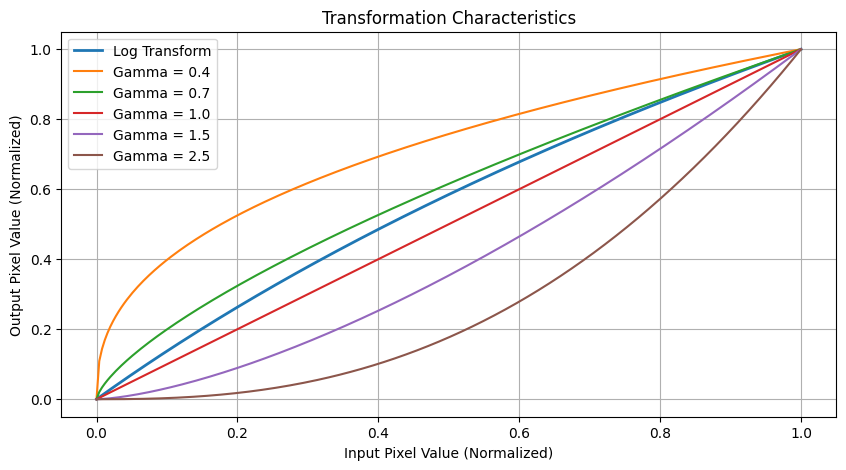

In [ ]:
r = np.linspace(0, 1, 256)

# Log curve
s_log = c_log * np.log(1 + r)

plt.figure(figsize=(10, 5))
plt.plot(r, s_log, label="Log Transform", linewidth=2)

# Gamma curves
for gamma in gamma_values:
    s_gamma = np.power(r, gamma)
    plt.plot(r, s_gamma, label=f"Gamma = {gamma}")

plt.xlabel("Input Pixel Value (Normalized)")
plt.ylabel("Output Pixel Value (Normalized)")
plt.title("Transformation Characteristics")
plt.legend()
plt.grid(True)
plt.show()


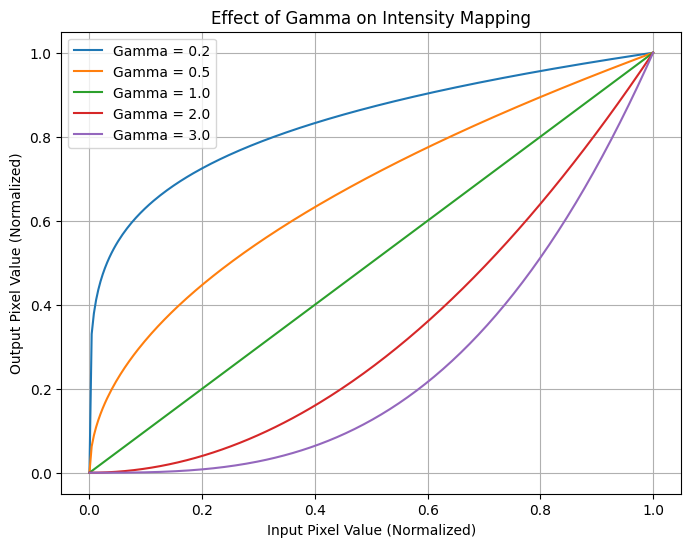

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input range (normalized)
r = np.linspace(0, 1, 256)

# Gamma values to test
gamma_values = [0.2, 0.5, 1.0, 2.0, 3.0]

# Plot curves
plt.figure(figsize=(8, 6))
for gamma in gamma_values:
    s_gamma = np.power(r, gamma)
    plt.plot(r, s_gamma, label=f"Gamma = {gamma}")

plt.xlabel("Input Pixel Value (Normalized)")
plt.ylabel("Output Pixel Value (Normalized)")
plt.title("Effect of Gamma on Intensity Mapping")
plt.legend()
plt.grid(True)
plt.show()
